In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
POS_df = pd.read_csv("home-credit-default-risk\POS_CASH_balance.csv")

In [3]:
POS_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.00,45.00,Active,0,0
1,1715348,367990,-33,36.00,35.00,Active,0,0
2,1784872,397406,-32,12.00,9.00,Active,0,0
3,1903291,269225,-35,48.00,42.00,Active,0,0
4,2341044,334279,-35,36.00,35.00,Active,0,0


In [4]:
POS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


###### SK_ID_PREV: "ID of previous credit in Home Credit related to loan in our sample. <b>(One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"</b>
###### SK_ID_CURR: ID of loan in our sample
###### MONTHS_BALANCE: "Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )" (khoảng cách của khoản vay gần nhất trước đấy)
###### CNT_INSTALMENT: Term of previous credit (can change over time) (thời hạn của tín dụng trước)
###### CNT_INSTALMENT_FUTURE: Installments left to pay on the previous credit (phần trả góp còn thiếu từ những khoản nợ trước đó)
###### NAME_CONTRACT_STATUS: Contract status during the month (tình trạng của hợp đồng)
###### SK_DPD: DPD (days past due) during the month of previous credit (số ngày quá hạn trong kì của previous credit)
###### SK_DPD_DEF: DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit (số ngày quá hạn trong kì của previous credit mà công ty chấp nhận)


In [5]:
POS_df.duplicated().sum()

0

In [6]:
POS_df.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [7]:
POS_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,"10,001,358.00","1,903,216.60","535,846.53","1,000,001.00","1,434,405.00","1,896,565.00","2,368,963.00","2,843,499.00"
SK_ID_CURR,"10,001,358.00","278,403.86","102,763.75","100,001.00","189,550.00","278,654.00","367,429.00","456,255.00"
MONTHS_BALANCE,"10,001,358.00",-35.01,26.07,-96.00,-54.00,-28.00,-13.00,-1.00
CNT_INSTALMENT,"9,975,287.00",17.09,12.00,1.00,10.00,12.00,24.00,92.00
CNT_INSTALMENT_FUTURE,"9,975,271.00",10.48,11.11,0.00,3.00,7.00,14.00,85.00
SK_DPD,"10,001,358.00",11.61,132.71,0.00,0.00,0.00,0.00,"4,231.00"
SK_DPD_DEF,"10,001,358.00",0.65,32.76,0.00,0.00,0.00,0.00,"3,595.00"


C:\Users\Duc\AppData\Local\Temp\ipykernel_10236\2267450322.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numeric_df_corr, dtype=np.bool)


<AxesSubplot:>

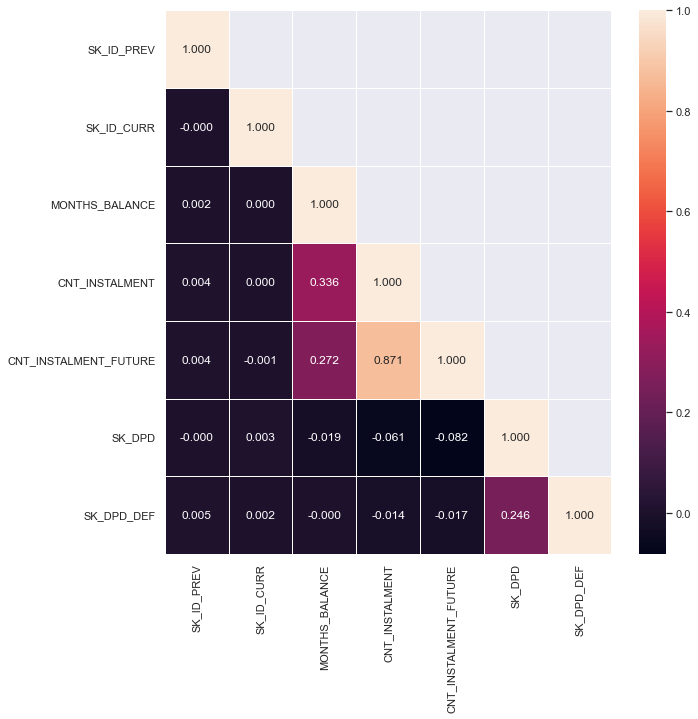

In [8]:
numeric_df = POS_df._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [9]:
def draw_distribution(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


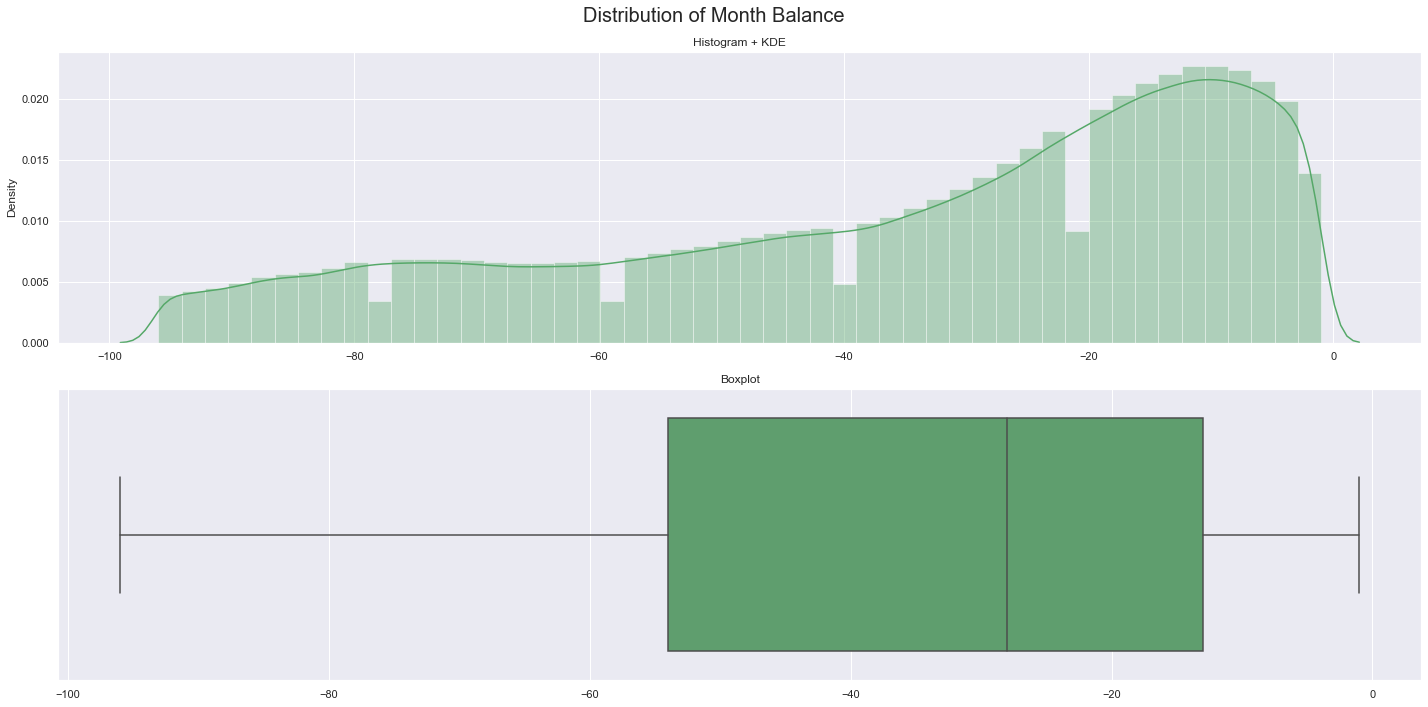

In [10]:
# distribution of MONTH_BALANCE
draw_distribution(POS_df['MONTHS_BALANCE'],'Distribution of Month Balance',"g")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


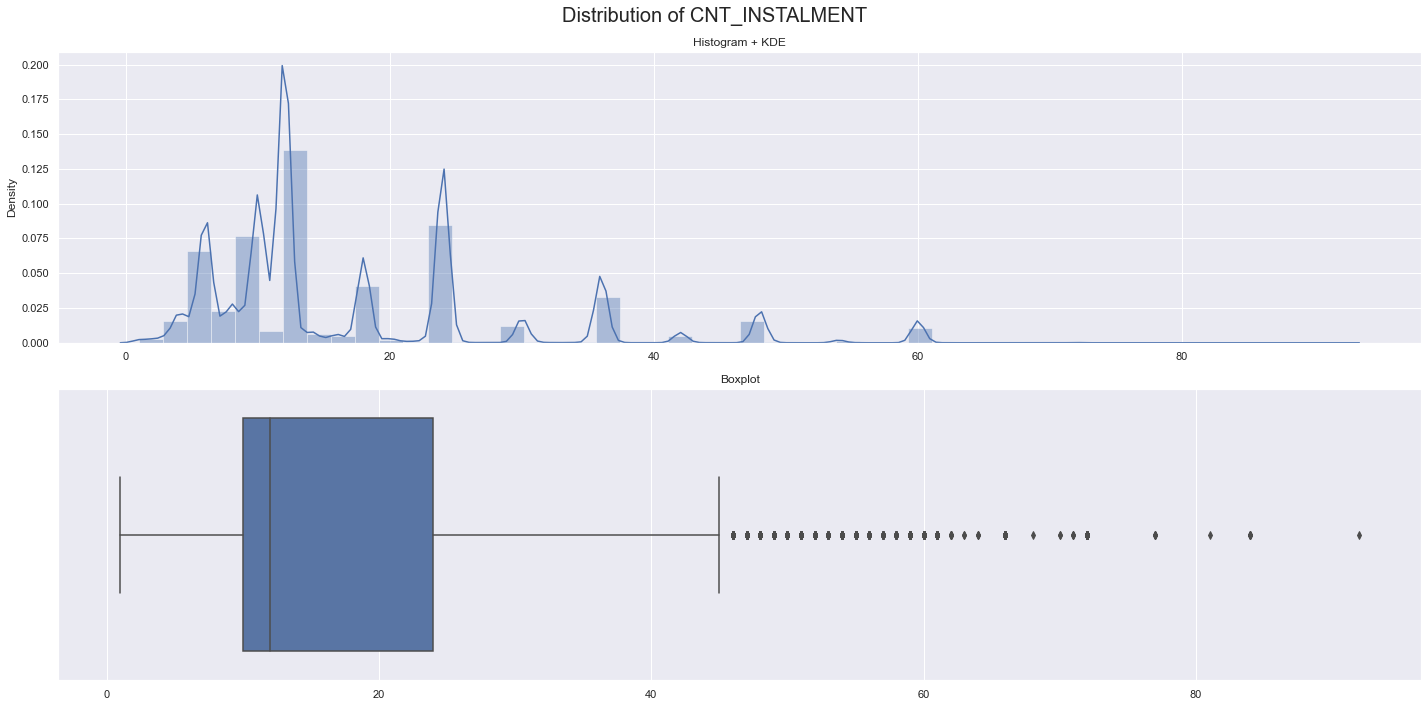

In [11]:
# distribution of CNT_INSTALMENT
draw_distribution(POS_df['CNT_INSTALMENT'],'Distribution of CNT_INSTALMENT',"b")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


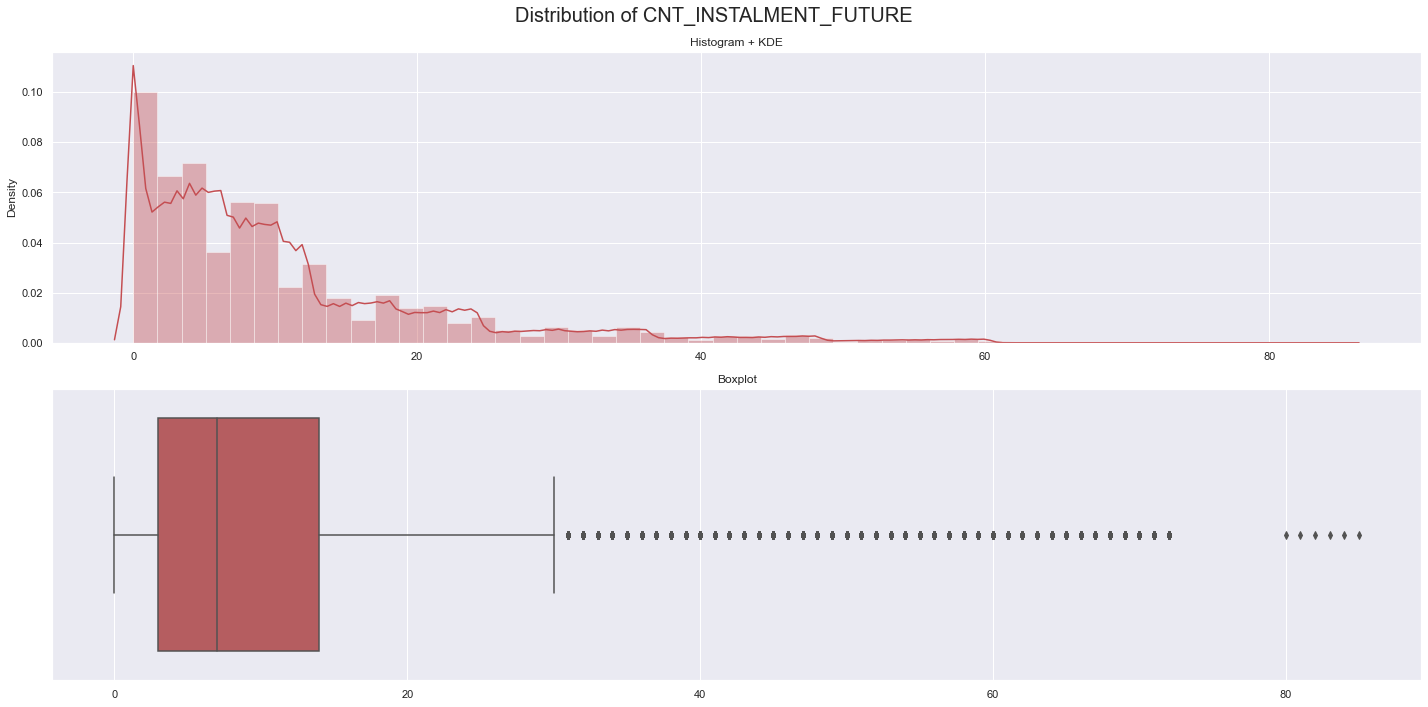

In [12]:
# distribution of CNT_INSTALMENT_FUTURE
draw_distribution(POS_df['CNT_INSTALMENT_FUTURE'],'Distribution of CNT_INSTALMENT_FUTURE',"r")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


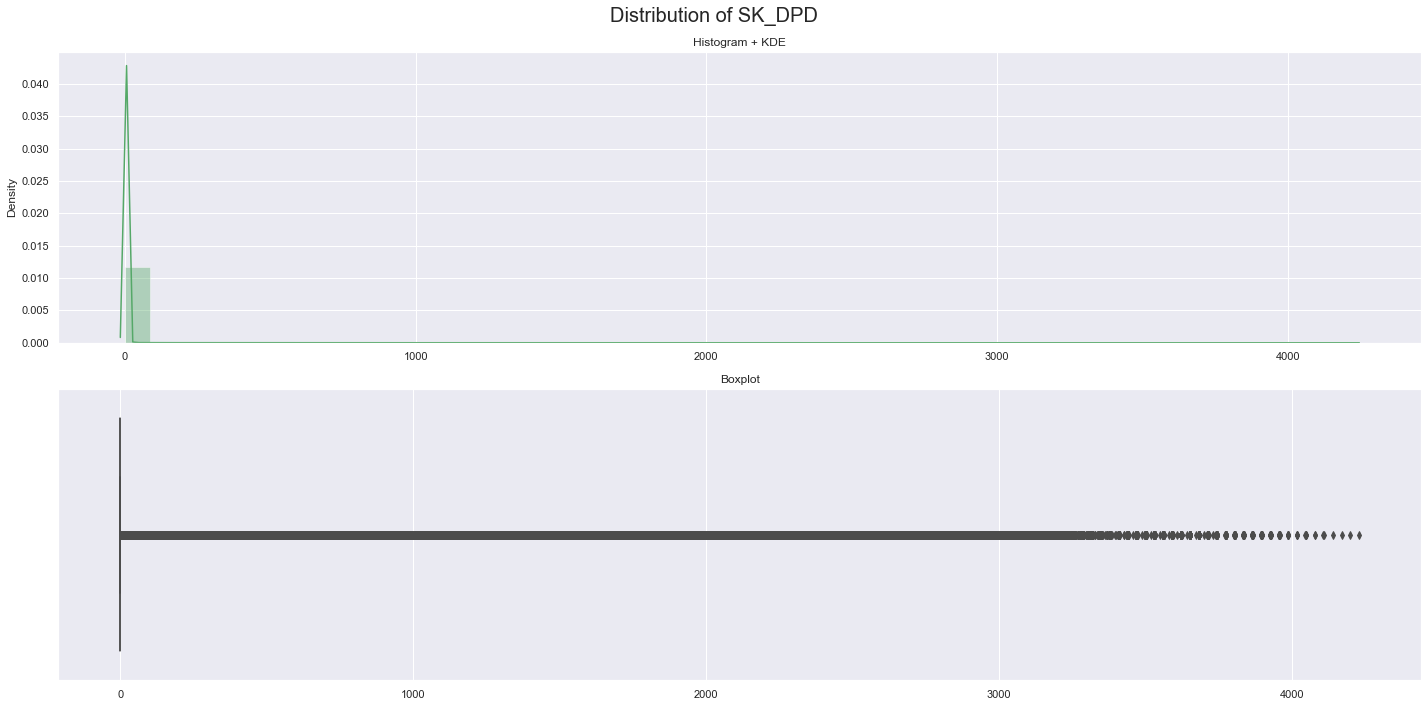

In [13]:
# distribution of SK_DPD
draw_distribution(POS_df['SK_DPD'],'Distribution of SK_DPD',"g")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


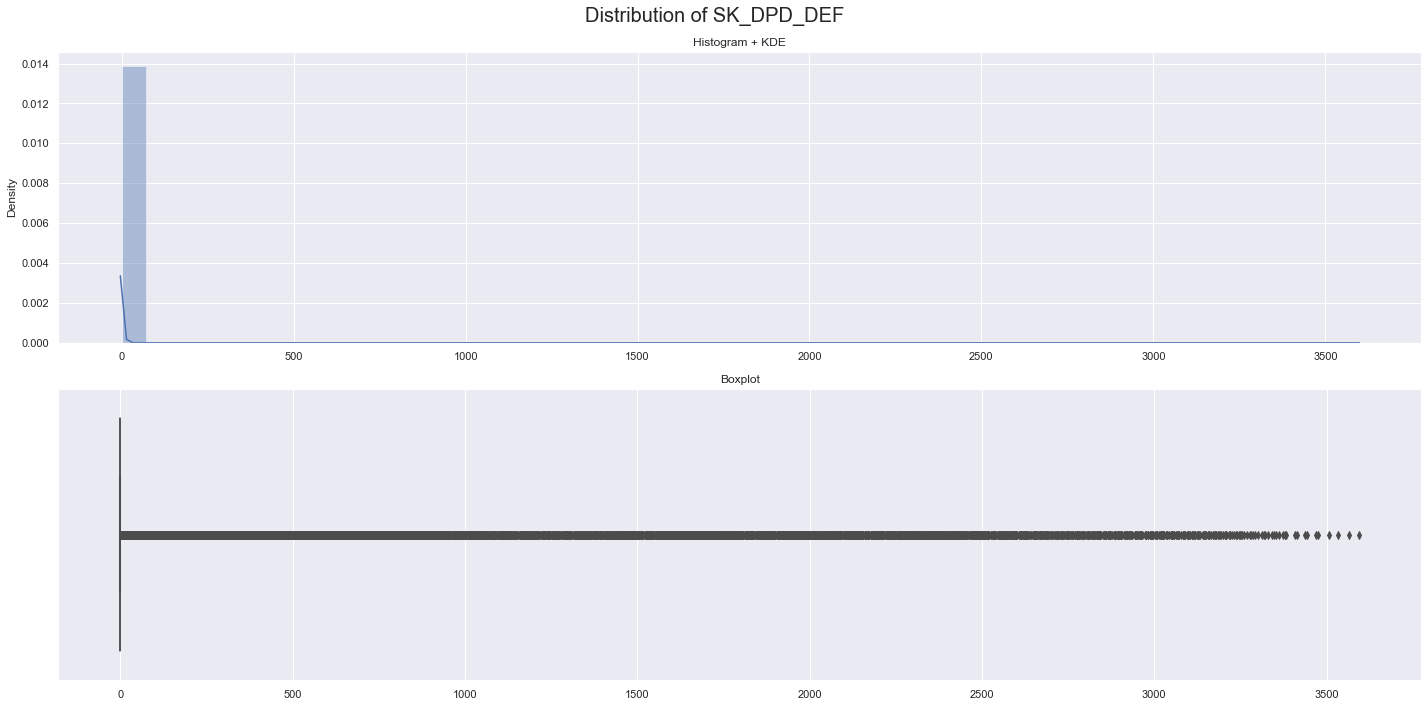

In [14]:
# distribution of SK_DPD_DEF
draw_distribution(POS_df['SK_DPD_DEF'],'Distribution of SK_DPD_DEF',"b")

In [15]:
POS_df["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

Active                  91.50
Completed                7.45
Signed                   0.87
Demand                   0.07
Returned to the store    0.05
Approved                 0.05
Amortized debt           0.01
Canceled                 0.00
XNA                      0.00
Name: NAME_CONTRACT_STATUS, dtype: float64

In [16]:
## get the most recent record of this dataset
POS_df_filter = POS_df.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
POS_df_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100001,1369693,-53,4.00,0.00,Completed,0,0
1,100001,1851984,-93,4.00,0.00,Completed,0,0
2,100002,1038818,-1,24.00,6.00,Active,0,0
3,100003,1810518,-18,7.00,0.00,Completed,0,0
4,100003,2396755,-66,12.00,1.00,Active,0,0
...,...,...,...,...,...,...,...,...
936320,456255,1359084,-7,8.00,0.00,Completed,0,0
936321,456255,1743609,-23,10.00,0.00,Completed,0,0
936322,456255,2073384,-17,3.00,0.00,Completed,0,0
936323,456255,2631384,-2,24.00,0.00,Completed,0,0


In [17]:
POS_df[(POS_df["SK_ID_CURR"] == 100001) & (POS_df["SK_ID_PREV"] == 1369693)]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2197888,1369693,100001,-53,4.00,0.00,Completed,0,0
4704415,1369693,100001,-54,4.00,1.00,Active,0,0
7167007,1369693,100001,-57,4.00,4.00,Active,0,0
7823681,1369693,100001,-55,4.00,2.00,Active,0,0
8789081,1369693,100001,-56,4.00,3.00,Active,0,0


#### Đếm số lần trả góp mới hoàn thành

In [18]:
POS_df_filter["Completed_Flag"] = POS_df_filter["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
POS_df_filter["Completed_Count"] = POS_df_filter.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
POS_df_filter.drop(["Completed_Flag"], axis=1, inplace= True)
POS_df_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,100001,1369693,-53,4.00,0.00,Completed,0,0,2
1,100001,1851984,-93,4.00,0.00,Completed,0,0,2
2,100002,1038818,-1,24.00,6.00,Active,0,0,0
3,100003,1810518,-18,7.00,0.00,Completed,0,0,2
4,100003,2396755,-66,12.00,1.00,Active,0,0,2
...,...,...,...,...,...,...,...,...,...
936320,456255,1359084,-7,8.00,0.00,Completed,0,0,6
936321,456255,1743609,-23,10.00,0.00,Completed,0,0,6
936322,456255,2073384,-17,3.00,0.00,Completed,0,0,6
936323,456255,2631384,-2,24.00,0.00,Completed,0,0,6


<AxesSubplot:xlabel='Completed_Count'>

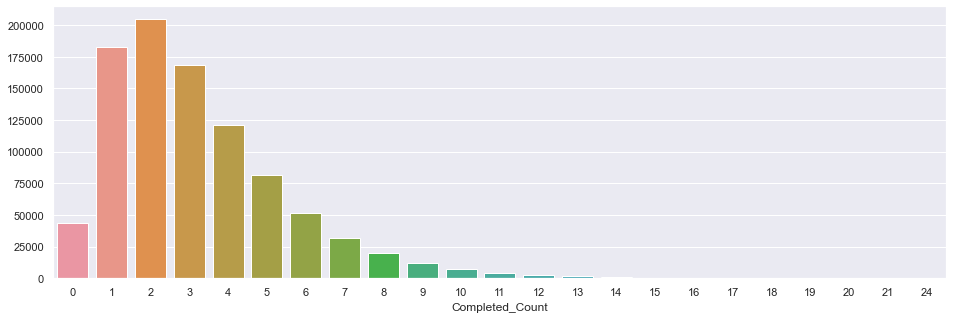

In [19]:
completed_count_SK = POS_df_filter.groupby(["Completed_Count"]).size()
plt.figure(figsize=(16,5))
sns.barplot(x=  completed_count_SK.index , y= completed_count_SK.values )

#### Đếm số lần trả góp quá hạn bởi ID

In [20]:
def overdue_flag(x):
    if x['SK_DPD_DEF'] > 0 and x['CNT_INSTALMENT_FUTURE'] > 0:
        return 1
    else:
        return 0

POS_df_filter["Overdue_flag"] = POS_df_filter.apply(overdue_flag, axis= 1)
POS_df_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count,Overdue_flag
0,100001,1369693,-53,4.00,0.00,Completed,0,0,2,0
1,100001,1851984,-93,4.00,0.00,Completed,0,0,2,0
2,100002,1038818,-1,24.00,6.00,Active,0,0,0,0
3,100003,1810518,-18,7.00,0.00,Completed,0,0,2,0
4,100003,2396755,-66,12.00,1.00,Active,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
936320,456255,1359084,-7,8.00,0.00,Completed,0,0,6,0
936321,456255,1743609,-23,10.00,0.00,Completed,0,0,6,0
936322,456255,2073384,-17,3.00,0.00,Completed,0,0,6,0
936323,456255,2631384,-2,24.00,0.00,Completed,0,0,6,0


In [21]:
POS_df_filter["Overdue_Count"] = POS_df_filter.groupby(["SK_ID_CURR"])["Overdue_flag"].transform("sum")
POS_df_filter.drop(["Overdue_flag"], axis= 1, inplace= True)
POS_df_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count,Overdue_Count
0,100001,1369693,-53,4.00,0.00,Completed,0,0,2,0
1,100001,1851984,-93,4.00,0.00,Completed,0,0,2,0
2,100002,1038818,-1,24.00,6.00,Active,0,0,0,0
3,100003,1810518,-18,7.00,0.00,Completed,0,0,2,0
4,100003,2396755,-66,12.00,1.00,Active,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
936320,456255,1359084,-7,8.00,0.00,Completed,0,0,6,0
936321,456255,1743609,-23,10.00,0.00,Completed,0,0,6,0
936322,456255,2073384,-17,3.00,0.00,Completed,0,0,6,0
936323,456255,2631384,-2,24.00,0.00,Completed,0,0,6,0


<AxesSubplot:xlabel='Overdue_Count'>

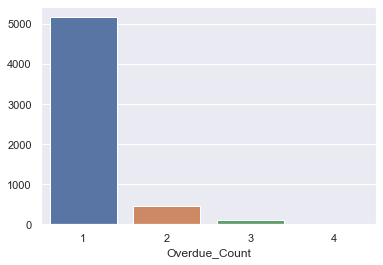

In [22]:
overdue_count_SK = POS_df_filter.groupby(["Overdue_Count"]).size()[1:]
sns.barplot(x= overdue_count_SK.index , y= overdue_count_SK.values )

In [23]:
agg_POS_df = POS_df.groupby('SK_ID_CURR')["MONTHS_BALANCE","CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE","SK_DPD", "SK_DPD_DEF"].agg( ['min', 'max', 'mean','std'])
agg_POS_df

C:\Users\Duc\AppData\Local\Temp\ipykernel_10236\3742389626.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_POS_df = POS_df.groupby('SK_ID_CURR')["MONTHS_BALANCE","CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE","SK_DPD", "SK_DPD_DEF"].agg( ['min', 'max', 'mean','std'])


MONTHS_BALANCE                  CNT_INSTALMENT                    \
                      min max   mean   std            min   max  mean   std   
SK_ID_CURR                                                                    
100001                -96 -53 -72.56 20.86           4.00  4.00  4.00  0.00   
100002                -19  -1 -10.00  5.63          24.00 24.00 24.00  0.00   
100003                -77 -18 -43.79 24.64           6.00 12.00 10.11  2.81   
100004                -27 -24 -25.50  1.29           3.00  4.00  3.75  0.50   
100005                -25 -15 -20.00  3.32           9.00 12.00 11.70  0.95   
...                   ...  ..    ...   ...            ...   ...   ...   ...   
456251                 -9  -1  -5.00  2.74           7.00  8.00  7.88  0.35   
456252                -82 -76 -79.00  2.16           6.00  6.00  6.00  0.00   
456253                -96 -57 -79.24 16.72           4.00 12.00  6.71  3.16   
456254                -11  -1  -5.55  3.03          14.00 16.00 14.90  1.02   
456255                -33  -2 -16.41  7.43           3.00 36.00 22.79 11.26   

           CNT_INSTALMENT_FUTURE                  SK_DPD                \
                             min   max  mean  std    min max mean  std   
SK_ID_CURR                                                               
100001                      0.00  4.00  1.44 1.42      0   7 0.78 2.33   
100002                      6.00 24.00 15.00 5.63      0   0 0.00 0.00   
100003                      0.00 12.00  5.79 3.84      0   0 0.00 0.00   
100004                      0.00  4.00  2.25 1.71      0   0 0.00 0.00   
100005                      0.00 12.00  7.20 3.61      0   0 0.00 0.00   
...                          ...   ...   ...  ...    ...  ..  ...  ...   
456251                      0.00  8.00  4.38 2.67      0   0 0.00 0.00   
456252                      0.00  6.00  3.00 2.16      0   0 0.00 0.00   
456253                      0.00  6.00  2.00 1.90      0   5 0.29 1.21   
456254                      4.00 16.00 10.35 3.36      0   0 0.00 0.00   
456255                      0.00 36.00 15.14 9.92      0   5 0.07 0.59   

           SK_DPD_DEF                
                  min max mean  std  
SK_ID_CURR                           
100001              0   7 0.78 2.33  
100002              0   0 0.00 0.00  
100003              0   0 0.00 0.00  
100004              0   0 0.00 0.00  
100005              0   0 0.00 0.00  
...               ...  ..  ...  ...  
456251              0   0 0.00 0.00  
456252              0   0 0.00 0.00  
456253              0   5 0.29 1.21  
456254              0   0 0.00 0.00  
456255              0   5 0.07 0.59  

[337252 rows x 20 columns]

In [24]:
agg_POS_df.columns = [c[0] + "_" + c[1].upper() for c in agg_POS_df.columns.values.tolist()]
agg_POS_df

,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_STD,CNT_INSTALMENT_MIN,CNT_INSTALMENT_MAX,CNT_INSTALMENT_MEAN,CNT_INSTALMENT_STD,CNT_INSTALMENT_FUTURE_MIN,CNT_INSTALMENT_FUTURE_MAX,CNT_INSTALMENT_FUTURE_MEAN,CNT_INSTALMENT_FUTURE_STD,SK_DPD_MIN,SK_DPD_MAX,SK_DPD_MEAN,SK_DPD_STD,SK_DPD_DEF_MIN,SK_DPD_DEF_MAX,SK_DPD_DEF_MEAN,SK_DPD_DEF_STD
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,
100001,-96,-53,-72.56,20.86,4.00,4.00,4.00,0.00,0.00,4.00,1.44,1.42,0,7,0.78,2.33,0,7,0.78,2.33
100002,-19,-1,-10.00,5.63,24.00,24.00,24.00,0.00,6.00,24.00,15.00,5.63,0,0,0.00,0.00,0,0,0.00,0.00
100003,-77,-18,-43.79,24.64,6.00,12.00,10.11,2.81,0.00,12.00,5.79,3.84,0,0,0.00,0.00,0,0,0.00,0.00
100004,-27,-24,-25.50,1.29,3.00,4.00,3.75,0.50,0.00,4.00,2.25,1.71,0,0,0.00,0.00,0,0,0.00,0.00
100005,-25,-15,-20.00,3.32,9.00,12.00,11.70,0.95,0.00,12.00,7.20,3.61,0,0,0.00,0.00,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,-9,-1,-5.00,2.74,7.00,8.00,7.88,0.35,0.00,8.00,4.38,2.67,0,0,0.00,0.00,0,0,0.00,0.00
456252,-82,-76,-79.00,2.16,6.00,6.00,6.00,0.00,0.00,6.00,3.00,2.16,0,0,0.00,0.00,0,0,0.00,0.00
456253,-96,-57,-79.24,16.72,4.00,12.00,6.71,3.16,0.00,6.00,2.00,1.90,0,5,0.29,1.21,0,5,0.29,1.21


In [25]:
agg_POS_df.isnull().sum()

MONTHS_BALANCE_MIN              0
MONTHS_BALANCE_MAX              0
MONTHS_BALANCE_MEAN             0
MONTHS_BALANCE_STD            372
CNT_INSTALMENT_MIN             28
CNT_INSTALMENT_MAX             28
CNT_INSTALMENT_MEAN            28
CNT_INSTALMENT_STD            394
CNT_INSTALMENT_FUTURE_MIN      28
CNT_INSTALMENT_FUTURE_MAX      28
CNT_INSTALMENT_FUTURE_MEAN     28
CNT_INSTALMENT_FUTURE_STD     394
SK_DPD_MIN                      0
SK_DPD_MAX                      0
SK_DPD_MEAN                     0
SK_DPD_STD                    372
SK_DPD_DEF_MIN                  0
SK_DPD_DEF_MAX                  0
SK_DPD_DEF_MEAN                 0
SK_DPD_DEF_STD                372
dtype: int64

In [26]:
agg_POS_df.fillna(0,inplace=True)
agg_POS_df.reset_index(inplace=True)

In [27]:
POS_df_final = POS_df_filter.groupby('SK_ID_CURR').first()[["Completed_Count","Overdue_Count"]]
POS_df_final

,Completed_Count,Overdue_Count
SK_ID_CURR,,
100001,2,0
100002,0,0
100003,2,0
100004,1,0
100005,1,0
...,...,...
456251,1,0
456252,1,0
456253,2,0


In [28]:
POS_df_final.merge(agg_POS_df, how= "left", on= "SK_ID_CURR")

,SK_ID_CURR,Completed_Count,Overdue_Count,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_STD,CNT_INSTALMENT_MIN,CNT_INSTALMENT_MAX,CNT_INSTALMENT_MEAN,...,CNT_INSTALMENT_FUTURE_MEAN,CNT_INSTALMENT_FUTURE_STD,SK_DPD_MIN,SK_DPD_MAX,SK_DPD_MEAN,SK_DPD_STD,SK_DPD_DEF_MIN,SK_DPD_DEF_MAX,SK_DPD_DEF_MEAN,SK_DPD_DEF_STD
0,100001,2,0,-96,-53,-72.56,20.86,4.00,4.00,4.00,...,1.44,1.42,0,7,0.78,2.33,0,7,0.78,2.33
1,100002,0,0,-19,-1,-10.00,5.63,24.00,24.00,24.00,...,15.00,5.63,0,0,0.00,0.00,0,0,0.00,0.00
2,100003,2,0,-77,-18,-43.79,24.64,6.00,12.00,10.11,...,5.79,3.84,0,0,0.00,0.00,0,0,0.00,0.00
3,100004,1,0,-27,-24,-25.50,1.29,3.00,4.00,3.75,...,2.25,1.71,0,0,0.00,0.00,0,0,0.00,0.00
4,100005,1,0,-25,-15,-20.00,3.32,9.00,12.00,11.70,...,7.20,3.61,0,0,0.00,0.00,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337247,456251,1,0,-9,-1,-5.00,2.74,7.00,8.00,7.88,...,4.38,2.67,0,0,0.00,0.00,0,0,0.00,0.00
337248,456252,1,0,-82,-76,-79.00,2.16,6.00,6.00,6.00,...,3.00,2.16,0,0,0.00,0.00,0,0,0.00,0.00
337249,456253,2,0,-96,-57,-79.24,16.72,4.00,12.00,6.71,...,2.00,1.90,0,5,0.29,1.21,0,5,0.29,1.21
337250,456254,0,0,-11,-1,-5.55,3.03,14.00,16.00,14.90,...,10.35,3.36,0,0,0.00,0.00,0,0,0.00,0.00
